In [5]:
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('C:\\Users\\Hazel\\Desktop\\Data Analyst (2024)\\Power BI & ML\\car data.csv')

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# Assuming 'df' is your DataFrame
report = sv.analyze(df)

# Save the report as an HTML file
report.show_html('sweetviz_report.html')

                                             |                                                                …

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
#EDA

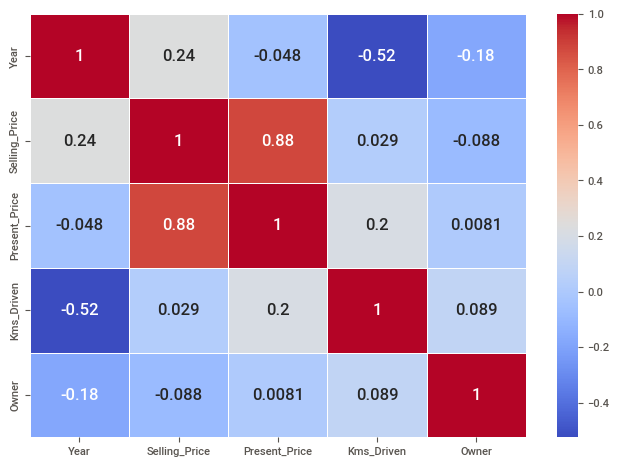

In [10]:
numerical_cols = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
numerical_df = df[numerical_cols]
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

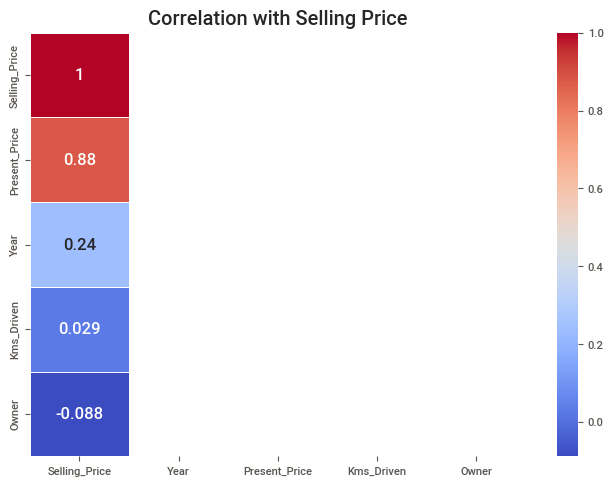

In [11]:
# Extract the correlations involving 'Selling_Price'
selling_price_corr = correlation_matrix[['Selling_Price']]

# Add the 'Selling_Price' row to the DataFrame without duplication
selling_price_corr = pd.concat([selling_price_corr, correlation_matrix.loc[['Selling_Price']]])

# Drop any duplicate rows if they exist
selling_price_corr = selling_price_corr.loc[~selling_price_corr.index.duplicated(keep='first')]

# Sort by 'Selling_Price' in descending order
selling_price_corr_sorted = selling_price_corr.sort_values(by='Selling_Price', ascending=False)

# Plot the heatmap
sns.heatmap(selling_price_corr_sorted, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Selling Price')
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Density'>

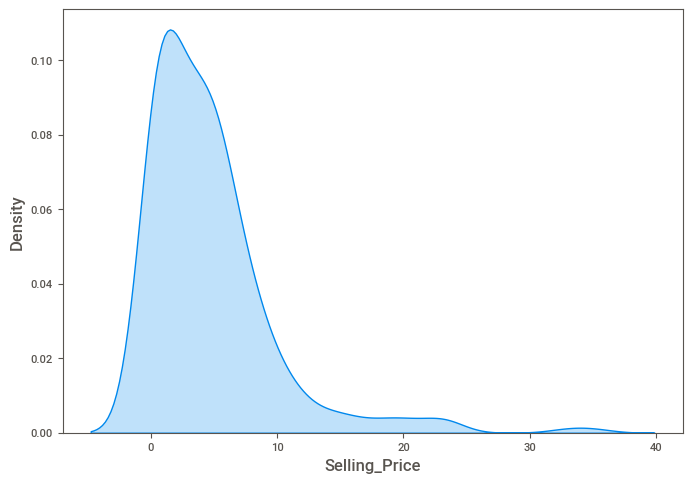

In [12]:
sns.kdeplot(df['Selling_Price'],shade=True)

<Axes: >

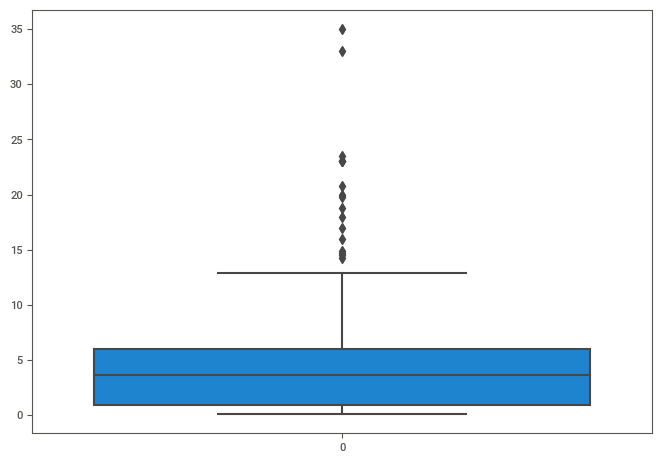

In [13]:
sns.boxplot(df['Selling_Price'])

In [14]:
setup(df,target='Selling_Price',train_size=.70,session_id=123)

,Description,Value
0,Session id,123
1,Target,Selling_Price
2,Target type,Regression
3,Original data shape,"(301, 9)"
4,Transformed data shape,"(301, 11)"
5,Transformed train set shape,"(210, 11)"
6,Transformed test set shape,"(91, 11)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


In [15]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,1.2179,3.6681,1.8197,0.8607,0.3599,1.1724,0.0550
lr,Linear Regression,1.2197,3.6557,1.8188,0.8603,0.3600,1.1786,0.9480
br,Bayesian Ridge,1.2179,3.8108,1.8417,0.8595,0.3602,1.1570,0.0540
lar,Least Angle Regression,1.2347,5.4351,2.0256,0.8344,0.3422,1.1189,0.0530
en,Elastic Net,1.3211,5.6378,2.1525,0.8126,0.3644,1.0092,0.0530
lasso,Lasso Regression,1.3546,5.8500,2.1865,0.8065,0.3579,0.9818,0.0550
llar,Lasso Least Angle Regression,1.3546,5.8502,2.1866,0.8065,0.3579,0.9818,0.0660
et,Extra Trees Regressor,1.2492,6.2349,2.1353,0.8026,0.4685,1.4567,0.1320
huber,Huber Regressor,1.3127,6.0649,2.1608,0.7955,0.2901,0.7157,0.0620
gbr,Gradient Boosting Regressor,1.2441,6.2429,2.0800,0.7838,0.4464,1.3484,0.0890


Ridge(random_state=123)

In [16]:
model=create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5665,5.1320,2.2654,0.7965,0.4919,1.4648
1,1.1684,2.4941,1.5793,0.8009,0.3344,0.7749
2,1.5411,4.6727,2.1616,0.8350,0.4573,2.5186
3,1.1863,2.2220,1.4906,0.9293,0.4848,1.7551
4,0.8529,1.2268,1.1076,0.9624,0.1465,0.3570
5,0.8625,1.1822,1.0873,0.8859,0.3877,1.4714
6,1.3614,7.8432,2.8006,0.8749,0.2478,0.5148
7,1.0117,1.4788,1.2161,0.8261,0.4093,1.6674
8,1.3989,6.8035,2.6084,0.8623,0.3771,0.9042


In [17]:
t_model=tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5665,5.1320,2.2654,0.7965,0.4919,1.4648
1,1.1684,2.4941,1.5793,0.8009,0.3344,0.7749
2,1.5411,4.6727,2.1616,0.8350,0.4573,2.5186
3,1.1863,2.2220,1.4906,0.9293,0.4848,1.7551
4,0.8529,1.2268,1.1076,0.9624,0.1465,0.3570
5,0.8625,1.1822,1.0873,0.8859,0.3877,1.4714
6,1.3614,7.8432,2.8006,0.8749,0.2478,0.5148
7,1.0117,1.4788,1.2161,0.8261,0.4093,1.6674
8,1.3989,6.8035,2.6084,0.8623,0.3771,0.9042


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:
t_model=tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5665,5.1320,2.2654,0.7965,0.4919,1.4648
1,1.1684,2.4941,1.5793,0.8009,0.3344,0.7749
2,1.5411,4.6727,2.1616,0.8350,0.4573,2.5186
3,1.1863,2.2220,1.4906,0.9293,0.4848,1.7551
4,0.8529,1.2268,1.1076,0.9624,0.1465,0.3570
5,0.8625,1.1822,1.0873,0.8859,0.3877,1.4714
6,1.3614,7.8432,2.8006,0.8749,0.2478,0.5148
7,1.0117,1.4788,1.2161,0.8261,0.4093,1.6674
8,1.3989,6.8035,2.6084,0.8623,0.3771,0.9042


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
final_df=predict_model(model)
final_df.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1.2700,5.3781,2.3191,0.6921,0.4624,2.1912


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,prediction_label
204,eon,2015,4.43,28282,Petrol,Dealer,Manual,0,2.75,3.464620
114,Royal Enfield Classic 350,2015,1.47,17000,Petrol,Individual,Manual,0,1.15,1.054685
166,Hero Passion Pro,2016,0.55,1000,Petrol,Individual,Manual,0,0.45,1.685933
279,city,2014,13.60,40126,Petrol,Dealer,Manual,0,6.25,7.849643
294,amaze,2014,6.80,33019,Petrol,Dealer,Manual,0,3.75,4.349362


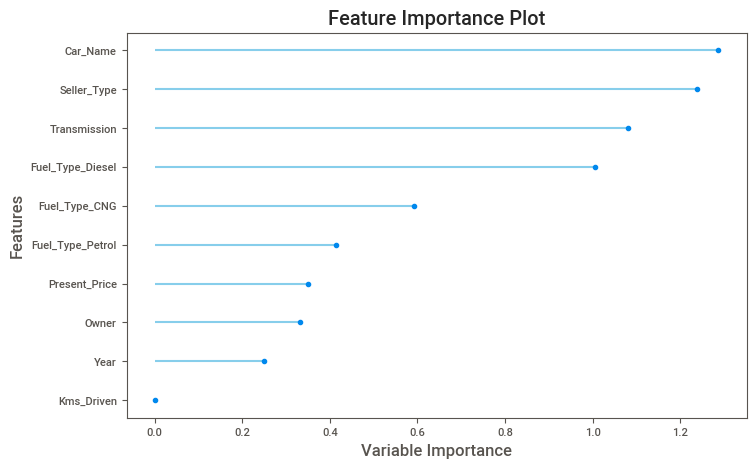

In [21]:
plot_model(model,'feature')

In [23]:
save_model(model, 'trial_reg')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Present_Price',
                                              'Kms_Driven', 'Owner'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Car_Name', 'Fuel_Type',
                                              'Seller_Type', 'Transmission'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  Tra...
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Fuel_Type'],
                                     transformer=OneHotEncoder(cols=['Fuel_Type'],
                                                               handle_missing='return_nan',
                                                               use_cat_name

In [31]:
coef=pd.DataFrame(zip(model.feature_names_in_,model.coef_),columns=['Features','Coefficients'])
coef

,Features,Coefficients
0,Car_Name,1.287010
1,Year,0.249938
2,Present_Price,0.350443
3,Kms_Driven,-0.000032
4,Fuel_Type_Petrol,-0.414167
5,Fuel_Type_Diesel,1.005166
6,Fuel_Type_CNG,-0.590999
7,Seller_Type,-1.237663
8,Transmission,-1.080442
9,Owner,-0.330733
